## Loading Full Code

In [26]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

def load_df(csv_path='D:\\Documents\\ga-customer-revenue-prediction\\train_v2.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df


df_small = load_df(nrows=3)


Loaded train_v2.csv. Shape: (3, 50)


In [25]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import ast

def load_df(csv_path='D:\\Documents\\ga-customer-revenue-prediction\\train_v2.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    x=0
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)

    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        print(df.shape)
    for index, row in df.iterrows():
        initial_id = df['fullVisitorId'][index]
        s = json.dumps(df['hits'][index])
        r = json.loads(s)
        d = ast.literal_eval(r)
        for each in d:
            each['fullVisitorId'] = initial_id
        column_as_df = json_normalize(d)
        print(column_as_df)
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop('hits', axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df


df_small = load_df(nrows=10)


(10, 28)
(10, 38)
(10, 44)
(10, 50)
                              appInfo.exitScreenName  \
0  shop.googlemerchandisestore.com/google+redesig...   

                           appInfo.landingScreenName appInfo.screenDepth  \
0  shop.googlemerchandisestore.com/google+redesig...                   0   

                                  appInfo.screenName  \
0  shop.googlemerchandisestore.com/google+redesig...   

  contentGroup.contentGroup1 contentGroup.contentGroup2  \
0                  (not set)                       Bags   

  contentGroup.contentGroup3 contentGroup.contentGroup4  \
0                  (not set)                  (not set)   

  contentGroup.contentGroup5 contentGroup.contentGroupUniqueViews2  ...   \
0                  (not set)                                     1  ...    

                                             product promotion  \
0  [{'productSKU': 'GGOEGDHC074099', 'v2ProductNa...        []   

  publisher_infos                                            

KeyError: 1

In [24]:
df_small.to_csv('test.csv')

## Loading Just `Hits`

In [22]:
# Inspired by notebooks from Julián Peller and Usman Abbas
# Extracts only the hits column to save memory
# Writes one CSV per MAXROWS rows

import pandas as pd 
from pandas.io.json import json_normalize
from ast import literal_eval

MAXROWS = 1e5 # per CSV

i = rows = 0 
for file in ['D:\\Documents\\ga-customer-revenue-prediction\\train_v2.csv', 'D:\\Documents\\ga-customer-revenue-prediction\\test_v2.csv']:
    reader = pd.read_csv(file, usecols=[6], chunksize = MAXROWS, skiprows=0)
    for chunk in reader:
        chunk.columns = ['hits']
        chunk['hits'][chunk['hits'] == "[]"] = "[{}]"
        chunk['hits'] = chunk['hits'].apply(literal_eval).str[1]
        chunk = json_normalize(chunk['hits'])

        # Extract the product and promo names from the complex nested structure into a simple flat list:
        if 'product' in chunk.columns:
            #print(chunk['product'][0])
            chunk['v2ProductName'] = chunk['product'].apply(lambda x: [p['v2ProductName'] for p in x] if type(x) == list else [])
            chunk['v2ProductCategory'] = chunk['product'].apply(lambda x: [p['v2ProductCategory'] for p in x] if type(x) == list else [])
            del chunk['product']
        if 'promotion' in chunk.columns:
            #print(chunk['promotion'][0])
            chunk['promoId']  = chunk['promotion'].apply(lambda x: [p['promoId'] for p in x] if type(x) == list else [])
            chunk['promoName']  = chunk['promotion'].apply(lambda x: [p['promoName'] for p in x] if type(x) == list else [])
            del chunk['promotion']

        chunk.to_csv(f"hits-{i:05d}.csv", index=False)
        rows += len(chunk.index)
        print(f"hits-{i:05d}.csv written ({rows} cumulative rows)")
        i += 1

AttributeError: 'float' object has no attribute 'values'

In [28]:
# THIS WORKS FOR GETTING A DICTIONARY OF HITS

import ast
s = json.dumps(df_small['hits'][1])
with open('output.txt', 'w') as x:
    x.write(s)
# r = json.loads(s)
# print(r)
# d = ast.literal_eval(r)
# print(json_normalize(d))

In [6]:
df_small.columns

Index(['channelGrouping', 'customDimensions', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.ses

In [3]:
#creating new df with just the column I need and dropping old to save RAM
print(df_small['trafficSource.campaign'].unique())
print(900000 - len(df_small[df_small['trafficSource.campaign'] == "(not set)"]))

['(not set)' '"google + redesign/Accessories March 17" All Users'
 'AW - Dynamic Search Ads Whole Site'
 '1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS'
 'Data Share Promo' 'Page: contains "/google+redesign/bags" All Users'
 '1000557 | GA | US | en | Hybrid | GDN Remarketing'
 'Page: contains "/google+redesign/office"'
 'Page: contains "/google+redesign/drinkware"'
 'Page: contains "/google+redesign/bags" 1 Day' 'AW - Electronics'
 'AW - Accessories' 'Smart Display Campaign'
 '"google + redesign/Accessories March 17" All Users Similar Audiences'
 'Page: contains "/google+redesign/drinkware" Similar Audiences'
 'Run of Network Line Item' 'Technology/Technophiles'
 'Technology/Mobile Enthusiasts' 'Media & Entertainment/Movie Lovers'
 'Media & Entertainment/Music Lovers' 'Lifestyles & Hobbies/Shutterbugs'
 'Sports & Fitness/Health & Fitness Buffs'
 'Page: contains "/google+redesign/office" Similar Audiences'
 'Value Shoppers Affinity' 'AW - Apparel'
 'Page: contains "/google+rede

From the first 100,000 lines of the CSV, we only have 5426 rows that contain a campaign

**Ideas:**
Do a number of random samples and get the average

In [4]:
ones = []

for each in df_small.columns:
    print(str(each) + ': ' + str(df_small[each].nunique()))
    if df_small[each].nunique() == 1:
        ones.append(each)

channelGrouping: 8
customDimensions: 6
date: 111
fullVisitorId: 262777
hits: 259982
socialEngagementType: 1
visitId: 289634
visitNumber: 301
visitStartTime: 289672
device.browser: 50
device.browserSize: 1
device.browserVersion: 1
device.deviceCategory: 3
device.flashVersion: 1
device.isMobile: 2
device.language: 1
device.mobileDeviceBranding: 1
device.mobileDeviceInfo: 1
device.mobileDeviceMarketingName: 1
device.mobileDeviceModel: 1
device.mobileInputSelector: 1
device.operatingSystem: 23
device.operatingSystemVersion: 1
device.screenColors: 1
device.screenResolution: 1
geoNetwork.city: 526
geoNetwork.cityId: 1
geoNetwork.continent: 6
geoNetwork.country: 206
geoNetwork.latitude: 1
geoNetwork.longitude: 1
geoNetwork.metro: 86
geoNetwork.networkDomain: 15272
geoNetwork.networkLocation: 1
geoNetwork.region: 354
geoNetwork.subContinent: 23
totals.bounces: 1
totals.hits: 194
totals.newVisits: 1
totals.pageviews: 151
totals.sessionQualityDim: 98
totals.timeOnSite: 3187
totals.totalTransacti

In [5]:
for each in ones:
    print(str(each))
    print(df_small[each].unique())
    print('\n')

socialEngagementType
['Not Socially Engaged']


device.browserSize
['not available in demo dataset']


device.browserVersion
['not available in demo dataset']


device.flashVersion
['not available in demo dataset']


device.language
['not available in demo dataset']


device.mobileDeviceBranding
['not available in demo dataset']


device.mobileDeviceInfo
['not available in demo dataset']


device.mobileDeviceMarketingName
['not available in demo dataset']


device.mobileDeviceModel
['not available in demo dataset']


device.mobileInputSelector
['not available in demo dataset']


device.operatingSystemVersion
['not available in demo dataset']


device.screenColors
['not available in demo dataset']


device.screenResolution
['not available in demo dataset']


geoNetwork.cityId
['not available in demo dataset']


geoNetwork.latitude
['not available in demo dataset']


geoNetwork.longitude
['not available in demo dataset']


geoNetwork.networkLocation
['not available in demo dataset']


to

### Remove these columns from the data 

* device.browserSize
* device.browserVersion
* device.flashVersion
* device.language
* device.mobileDeviceBranding
* device.mobileDeviceInfo
* device.mobileDeviceMarketingName
* device.mobileDeviceModel
* device.mobileInputSelector
* device.operatingSystemVersion
* device.screenColors
* device.screenResolution
* geoNetwork.cityId
* geoNetwork.latitude
* geoNetwork.longitude
* geoNetwork.networkLocation
* trafficSource.adwordsClickInfo.criteriaParameters


In [6]:
print(len(df_small.columns) - len(ones))

36


# Looking into the keywords

In [7]:
phrases = []
keywords = df_small['trafficSource.keyword'].dropna()
for each in keywords:
    if each != '(not provided)':
        phrases.append(each)

In [8]:
print(len(phrases))

14855


In [9]:
print(phrases[:100])

['water bottle', '(Remarketing/Content targeting)', '6qEhsCssdK0z36ri', '(automatic matching)', 'Google men', '1hZbAqLCbjwfgOH7', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', '(Remarketing/Content targeting)', '1X4Me6ZKNV0zg-jV', '6qEhsCssdK0z36ri', '(Remarketing/Content targeting)', '1hZbAqLCbjwfgOH7', '6qEhsCssdK0z36ri', '1hZbAqLCbjwfgOH7', '6qEhsCssdK0z36ri', 'google online merchandise', 'google water bottle', '1hZbAqLCbjwfgOH7', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', '(User vertical targeting)', '1X4Me6ZKNV0zg-jV', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', '(automatic matching)', 'google company store', '(automatic matching)', '(Remarketing/Content targeting)', '(Remarketing/Content targeting)', '6qEhsCssdK0z36ri', '(Remarketing/Content targeting)', '(automatic matching)', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', 'https://www.googlemerchandisestore.com/', '6qEhsCssdK0z36ri', '6qEhsCssdK0z36ri', '(Remarketing/Content targeting)', '6qEhsCssdK0z36ri', 

From looking at 900,000 data points, the training data only contains keywords in 43,343 keywords inputs.

In [10]:
words = " ". join(phrases)
words = words.split(' ')
print(len(words))

33837


Separating the phrases into distinct words there are 95,912 words total.

In [11]:
word_counts = {}
for each in words:
    if each not in word_counts:
        word_counts[each] = 1
    else:
        word_counts[each] += 1

In [12]:
word_counts_sorted = sorted(word_counts.items(), key=lambda kv: kv[1], reverse=True)
print(word_counts_sorted)

[('targeting)', 6375), ('(User', 5473), ('vertical', 5473), ('(automatic', 2982), ('matching)', 2982), ('6qEhsCssdK0z36ri', 1788), ('google', 1012), ('(Remarketing/Content', 902), ('store', 689), ('merchandise', 559), ('1hZbAqLCbjwfgOH7', 434), ('Google', 410), ('Merchandise', 352), ('youtube', 309), ('1X4Me6ZKNV0zg-jV', 172), ('+google', 170), ('shirt', 149), ('t', 149), ('+Google', 135), ('+store', 110), ('+Merchandise', 100), ('DoubleClick', 99), ('Ad', 99), ('Exchange', 99), ('merch', 88), ('shop', 84), ('online', 83), ('+merchandise', 74), ('you', 67), ('tube', 67), ('https://www.googlemerchandisestore.com/', 45), ('Youtube', 43), ('YouTube', 41), ('tshirt', 41), ('shirts', 40), ('buy', 37), ('+Products', 30), ('lava', 29), ('+merch', 24), ('bag', 23), ('for', 23), ('www', 22), ('india', 22), ('free', 22), ('Store', 22), ('+stores', 22), ('shopping', 21), ('lamp', 19), ('t-shirt', 18), ('android', 18), ('+YouTube', 18), ('to', 17), ('+Swag', 17), ('You', 16), ('on', 16), ('sticker

In [13]:
trans = df_small['totals.transactions'].dropna()
print(trans[:60])

433     1
550     1
555     1
597     1
619     1
634     1
650     1
654     1
657     1
659     1
665     1
670     1
678     1
684     1
685     1
692     1
694     1
698     1
699     1
701     1
709     1
713     1
715     1
716     1
4331    1
4340    1
4382    1
4386    1
4444    1
4450    1
4474    1
4492    1
4507    1
4508    1
4515    1
4516    1
4536    2
4554    1
4557    1
4558    1
4582    1
4583    1
4592    1
4603    1
4604    1
4609    1
4611    1
4619    1
4624    1
4637    1
4638    1
4639    2
4645    1
4647    2
6080    1
6109    1
6207    1
6212    1
6286    1
6289    1
Name: totals.transactions, dtype: object


In [14]:
customer1 = df_small.iloc[4536]

In [15]:
# df_small.hist(column='totals.visits', by='fullVisitorId')

In [16]:
print(customer1['hits'])

[{'hitNumber': '1', 'time': '0', 'hour': '10', 'minute': '31', 'isInteraction': True, 'isEntrance': True, 'page': {'pagePath': '/google+redesign/drinkware/android+17oz+stainless+steel+sport+bottle.axd', 'hostname': 'shop.googlemerchandisestore.com', 'pageTitle': 'Android 17oz Stainless Steel Sport Bottle', 'pagePathLevel1': '/google+redesign/', 'pagePathLevel2': '/drinkware/', 'pagePathLevel3': '/android+17oz+stainless+steel+sport+bottle.axd', 'pagePathLevel4': ''}, 'transaction': {'currencyCode': 'USD'}, 'item': {'currencyCode': 'USD'}, 'appInfo': {'screenName': 'shop.googlemerchandisestore.com/google+redesign/drinkware/android+17oz+stainless+steel+sport+bottle.axd', 'landingScreenName': 'shop.googlemerchandisestore.com/google+redesign/drinkware/android+17oz+stainless+steel+sport+bottle.axd', 'exitScreenName': 'shop.googlemerchandisestore.com/ordercompleted.html', 'screenDepth': '0'}, 'exceptionInfo': {'isFatal': True}, 'product': [{'productSKU': '9180793', 'v2ProductName': '26 oz Dou

In [17]:
df_grouped_by_ID = df_small.groupby('fullVisitorId')

## Simple Training

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.metrics import mean_squared_error

In [19]:
## Testing
df_test = load_df('D:\\Documents\\ga-customer-revenue-prediction\\test_v2.csv')

## Training is using df_small

Loaded test_v2.csv. Shape: (401589, 59)


In [20]:
cols_to_remove = [x for x in ones if set(df_small[x].unique()) == set(['not available in demo dataset'])]
cols_to_remove.append('hits')
print(cols_to_remove)

['device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.criteriaParameters', 'hits']


In [21]:
y = df_small['totals.totalTransactionRevenue'].fillna(0).astype(float)
y = y.apply(lambda x: np.log1p(x))
df_train = df_small.drop('totals.totalTransactionRevenue', axis=1)

In [22]:
df_train = df_train.drop(list(cols_to_remove), axis=1)
df_train.columns

# doing the same to our testing set:
df_test = df_test.drop(list(cols_to_remove), axis=1)
df_test.columns

Index(['channelGrouping', 'customDimensions', 'date', 'fullVisitorId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.deviceCategory', 'device.isMobile',
       'device.operatingSystem', 'geoNetwork.city', 'geoNetwork.continent',
       'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.sessionQualityDim', 'totals.timeOnSite',
       'totals.totalTransactionRevenue', 'totals.transactionRevenue',
       'totals.transactions', 'totals.visits', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTr

In [31]:
cat_columns = ['channelGrouping',
               'socialEngagementType',
               'device.browser',
               'device.deviceCategory',
               'device.operatingSystem',
               'geoNetwork.city',
               'geoNetwork.continent',
               'geoNetwork.country',
               'geoNetwork.metro', 
               'geoNetwork.networkDomain',
               'geoNetwork.region', 
               'geoNetwork.subContinent',
               'trafficSource.adContent',
               'trafficSource.adwordsClickInfo.adNetworkType',
               'trafficSource.adwordsClickInfo.gclId',
               'trafficSource.adwordsClickInfo.page',
               'trafficSource.adwordsClickInfo.slot', 
               'trafficSource.campaign',
               'trafficSource.keyword',
               'trafficSource.referralPath',
               'trafficSource.source',
               'trafficSource.medium'
              ]

In [32]:
from sklearn import preprocessing
for each in cat_columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df_train[each].values) + list(df_test[each].values))
    df_train[each] = lbl.transform(list(df_train[each].values))
    df_test[each] = lbl.transform(list(df_test[each].values))

KeyError: 'trafficSource.campaignCode'

In [25]:
# Getting our vailidation y for scoring
y_true = df_test['totals.totalTransactionRevenue'].fillna(0).astype(float)
y_true = y_true.apply(lambda x: np.log1p(x))
df_test = df_test.drop('totals.totalTransactionRevenue', axis=1)

y_mean = np.mean(y)
y_base = np.full_like(y_true, y_mean)

In [58]:
# df_train = df_train.drop('customDimensions', axis=1)
# df_test = df_test.drop('customDimensions', axis=1)
# df_train = df_train.drop('totals.transactionRevenue', axis=1)
# df_test = df_test.drop('totals.transactionRevenue', axis=1)
df_train = df_train.drop('totals.transactions', axis=1)
df_test = df_test.drop('totals.transactions', axis=1)

In [35]:
df_train.iloc[1]

channelGrouping                                                   6
date                                                       20171016
fullVisitorId                                   8934116514970143966
socialEngagementType                                              0
visitId                                                  1508176307
visitNumber                                                       6
visitStartTime                                           1508176307
device.browser                                                   35
device.deviceCategory                                             0
device.isMobile                                               False
device.operatingSystem                                            3
geoNetwork.city                                                 176
geoNetwork.continent                                              2
geoNetwork.country                                              204
geoNetwork.metro                                

In [27]:
def preprocess(df):
    df['totals.bounces'] = df['totals.bounces'].fillna(0).astype(np.float)
    df['totals.newVisits'] = df['totals.newVisits'].fillna(0).astype(np.float)
    df['totals.transactionRevenue'] = df['totals.transactionRevenue'].fillna(0).astype(np.float)
    df['totals.transactions'] = df['totals.transactions'].fillna(0).astype(np.float)
    df['trafficSource.adwordsClickInfo.isVideoAd'] = df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(0).astype(np.float)
    df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(0).astype(np.float)
    
    return df
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [28]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [59]:
from sklearn import tree
clf_tree = tree.DecisionTreeRegressor()
clf_tree = clf_tree.fit(df_train, y)

In [60]:
y_pred = clf_tree.predict(df_test)

In [61]:
print(mean_squared_error(y_true, y_pred))

15.820041705132427


In [62]:
for idx, each in enumerate(clf_tree.feature_importances_):
    print(idx, each*1e5)

print('-'*10)

for idx, each in enumerate(df_train.columns):
    print(idx, each)

0 778.008687333321
1 2853.879216100523
2 10308.48133066028
3 0.0
4 5720.790467907291
5 3208.936045497525
6 6005.543690639148
7 859.1998978171625
8 615.3196606186611
9 346.1145419759292
10 2181.4454864351915
11 2705.165400672171
12 31.486473298831466
13 5876.454817035597
14 1464.2778674916865
15 3691.227967005558
16 2079.7827975568603
17 63.819229652572865
18 0.0
19 6148.435736402376
20 1198.5121950450014
21 21320.595038232063
22 3486.3045436995426
23 12559.34948622865
24 0.0
25 51.754221373627644
26 43.06606526006061
27 469.658466991134
28 0.0
29 111.87443239015424
30 58.04798557525869
31 189.01338998579953
32 1074.0088140527162
33 703.3845395620833
34 525.0331164301982
35 2892.95266789783
36 378.07572317517986
----------
0 channelGrouping
1 date
2 fullVisitorId
3 socialEngagementType
4 visitId
5 visitNumber
6 visitStartTime
7 device.browser
8 device.deviceCategory
9 device.isMobile
10 device.operatingSystem
11 geoNetwork.city
12 geoNetwork.continent
13 geoNetwork.country
14 geoNetwork

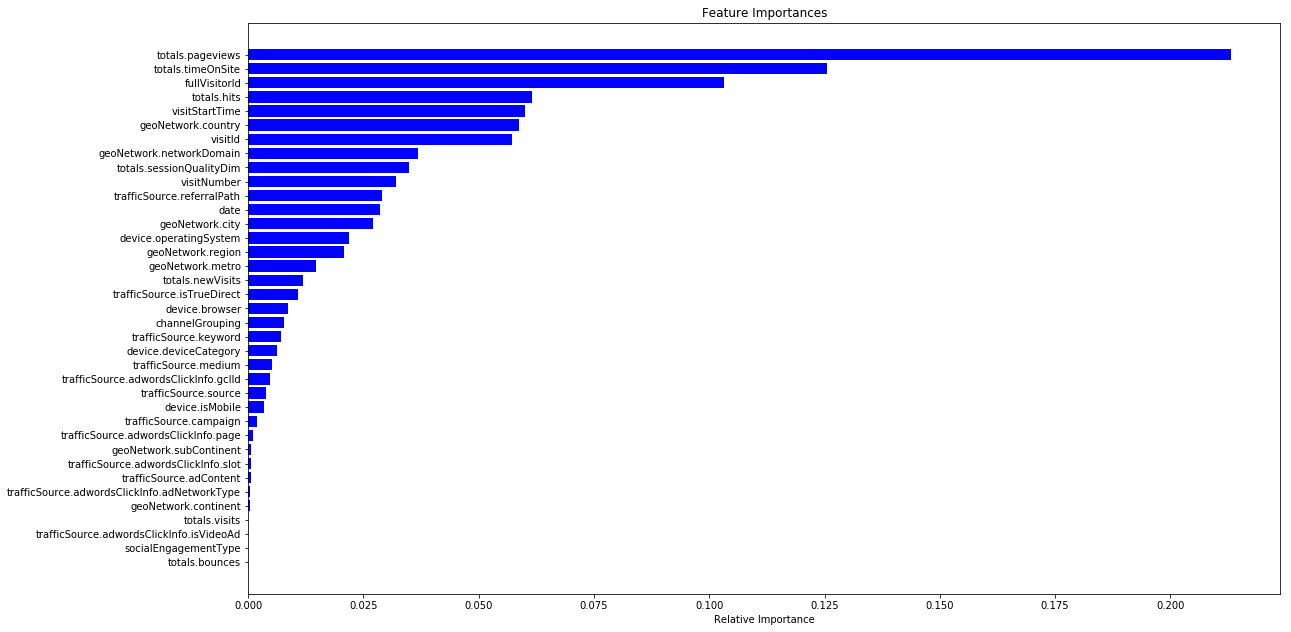

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

features = df_train.columns
importances = clf_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()